## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Load

In [2]:
data_path = '../data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

----

In [3]:
pd.set_option('display.float_format', '{:.3f}'.format)  # 소수점 3자리 고정

## train_df

### 데이터 통계값

In [4]:
# 데이터 분포 확인
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


,user,item,time
count,5154471.000,5154471.000,5154471.000
mean,68751.526,17168.492,1248016668.337
std,39934.604,26335.635,89683016.228
min,11.000,1.000,1113220585.000
25%,34199.000,1304.000,1170354773.000
50%,68605.000,3897.000,1234651154.000
75%,103201.000,26712.000,1318284098.500
max,138493.000,119145.000,1427781052.000


In [5]:
# 결측치 확인
train_df.isnull().sum()

user    0
item    0
time    0
dtype: int64

In [6]:
# 중복 행 확인
train_df[train_df.duplicated()]

,user,item,time


In [7]:
print("users:", train_df['user'].nunique())
print("items", train_df['item'].nunique())

users: 31360
items 6807


In [8]:
# time 변수 타입 변환
train_df['time'] = pd.to_datetime(train_df['time'], unit='s')
train_df['hour'] = train_df['time'].dt.hour  # 시간대
train_df['weekday'] = train_df['time'].dt.dayofweek  # 요일 (0=Monday, 6=Sunday)
train_df['month'] = train_df['time'].dt.month  # 월
train_df['year'] = train_df['time'].dt.year  # 연도
train_df['year_month'] = train_df['time'].dt.to_period('M').astype(str)

### user

         user  item_count
1916     8405        2912
12416   54465        1980
5563    24219        1842
7417    32514        1830
20832   91349        1795
...       ...         ...
2528    11211          32
29208  128756          28
24060  105578          22
15643   68606          19
12135   53188          16

[31360 rows x 2 columns]


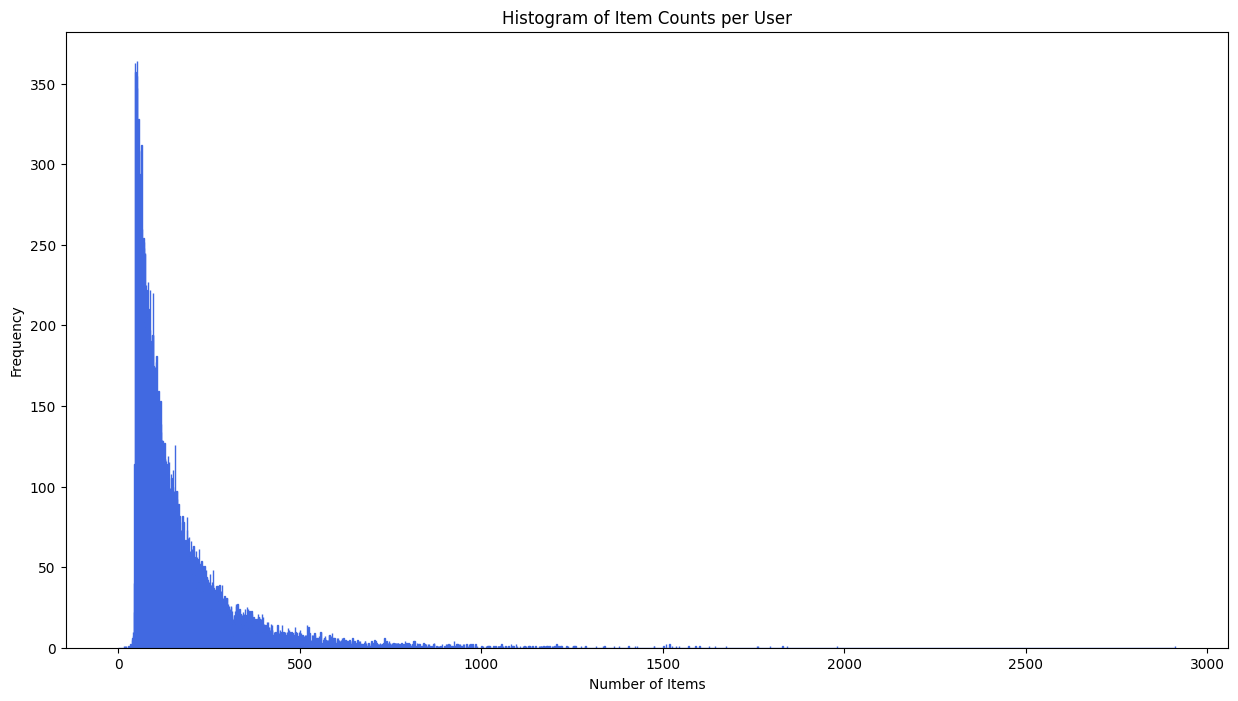

In [9]:
# user 별 item count
user_item_counts = train_df.groupby(by='user')['item'].count().reset_index()
user_item_counts.columns = ['user', 'item_count']
print(user_item_counts.sort_values(by='item_count', ascending=False))

plt.figure(figsize=(15,8))
plt.hist(user_item_counts['item_count'], bins=range(1, user_item_counts['item_count'].max() + 1), edgecolor='royalblue', align='left')
plt.title('Histogram of Item Counts per User')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

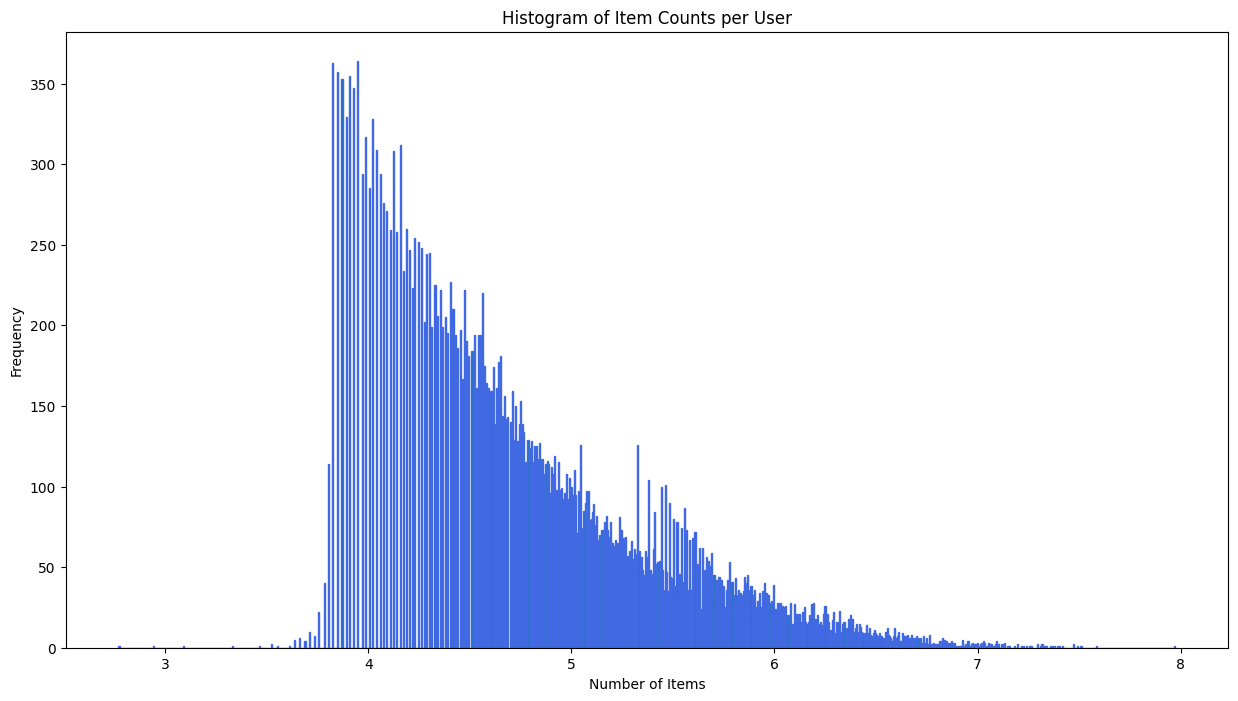

In [10]:
# log 변환
user_item_counts_log = np.log(user_item_counts['item_count'])

plt.figure(figsize=(15,8))
plt.hist(user_item_counts_log, bins=1000, edgecolor='royalblue', align='left')
plt.title('Histogram of Item Counts per User')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

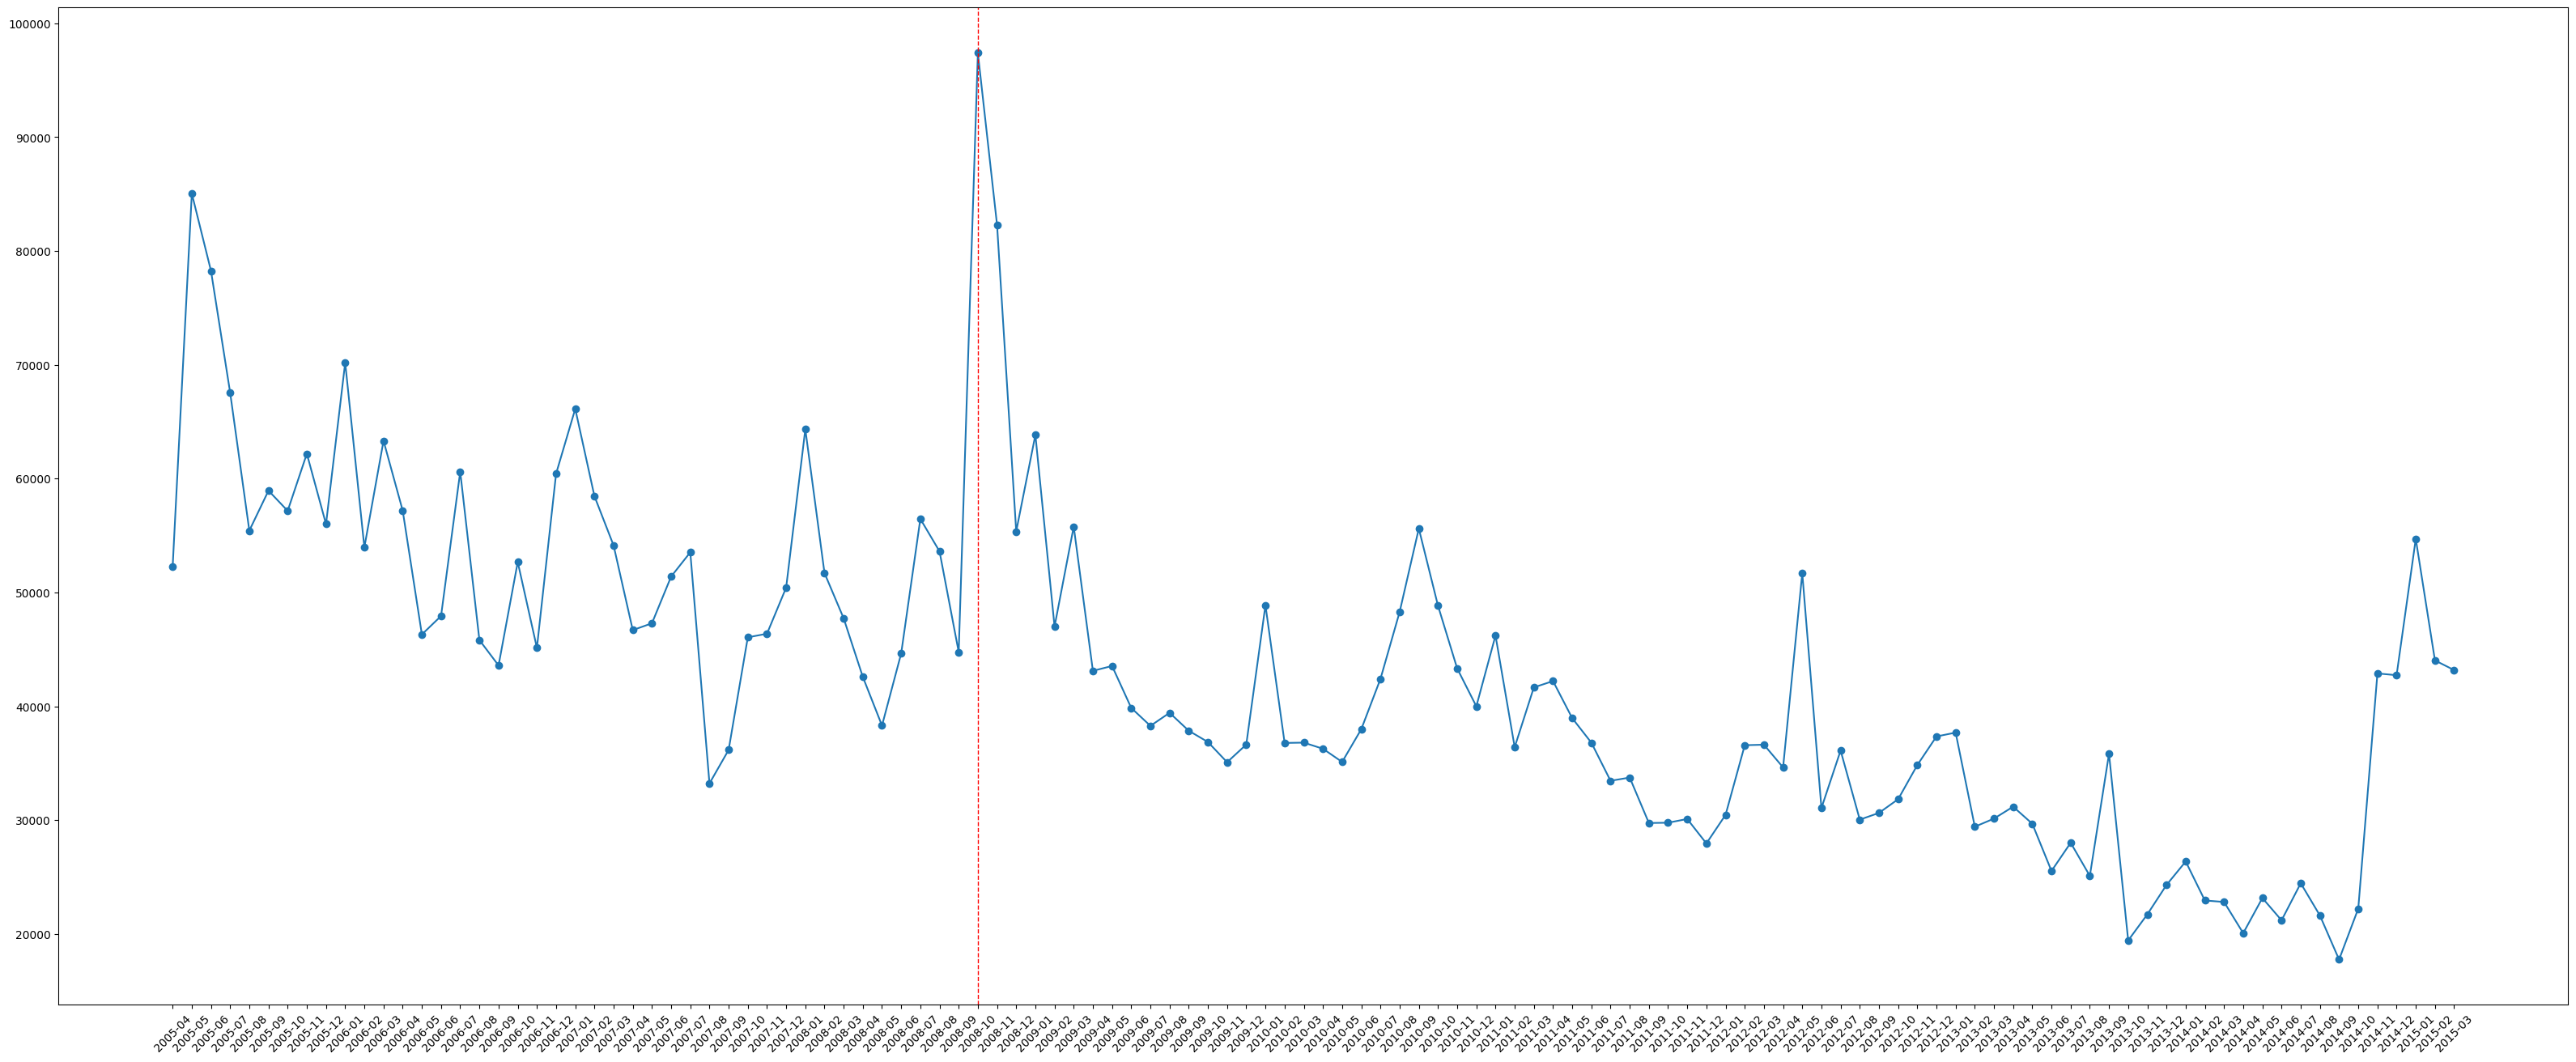

In [11]:
# 시계열 item count
yearmonth_user_item_counts = train_df.groupby(by=['year_month'])['item'].count().reset_index()
yearmonth_user_item_counts.columns = ['year_month', 'item_count']

max_ = yearmonth_user_item_counts['item_count'].max()
max_x = yearmonth_user_item_counts[yearmonth_user_item_counts['item_count'] == max_]['year_month'].values[0]

plt.figure(figsize=(40,16))
plt.plot(yearmonth_user_item_counts['year_month'], yearmonth_user_item_counts['item_count'], marker='o')
plt.xticks(rotation=45)
plt.axvline(x=max_x, color='red', linestyle='--', linewidth=1)
plt.show()

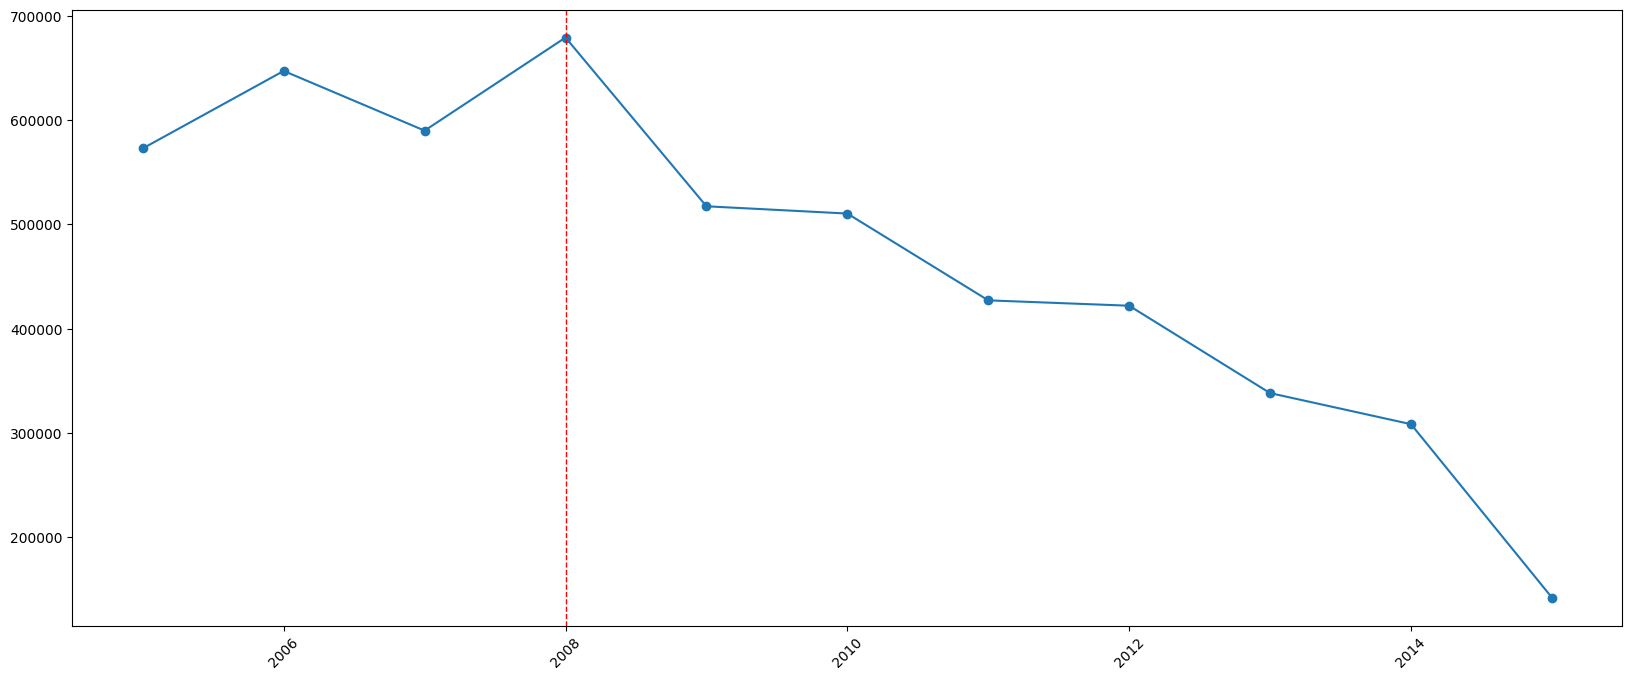

In [12]:
# 년도 별 item count
year_user_item_counts = train_df.groupby(by=['year'])['item'].count().reset_index()
year_user_item_counts.columns = ['year', 'item_count']

max_ = year_user_item_counts['item_count'].max()
max_x = year_user_item_counts[year_user_item_counts['item_count'] == max_]['year'].values[0]

plt.figure(figsize=(20,8))
plt.plot(year_user_item_counts['year'], year_user_item_counts['item_count'], marker='o')
plt.xticks(rotation=45)
plt.axvline(x=max_x, color='red', linestyle='--', linewidth=1)
plt.show()

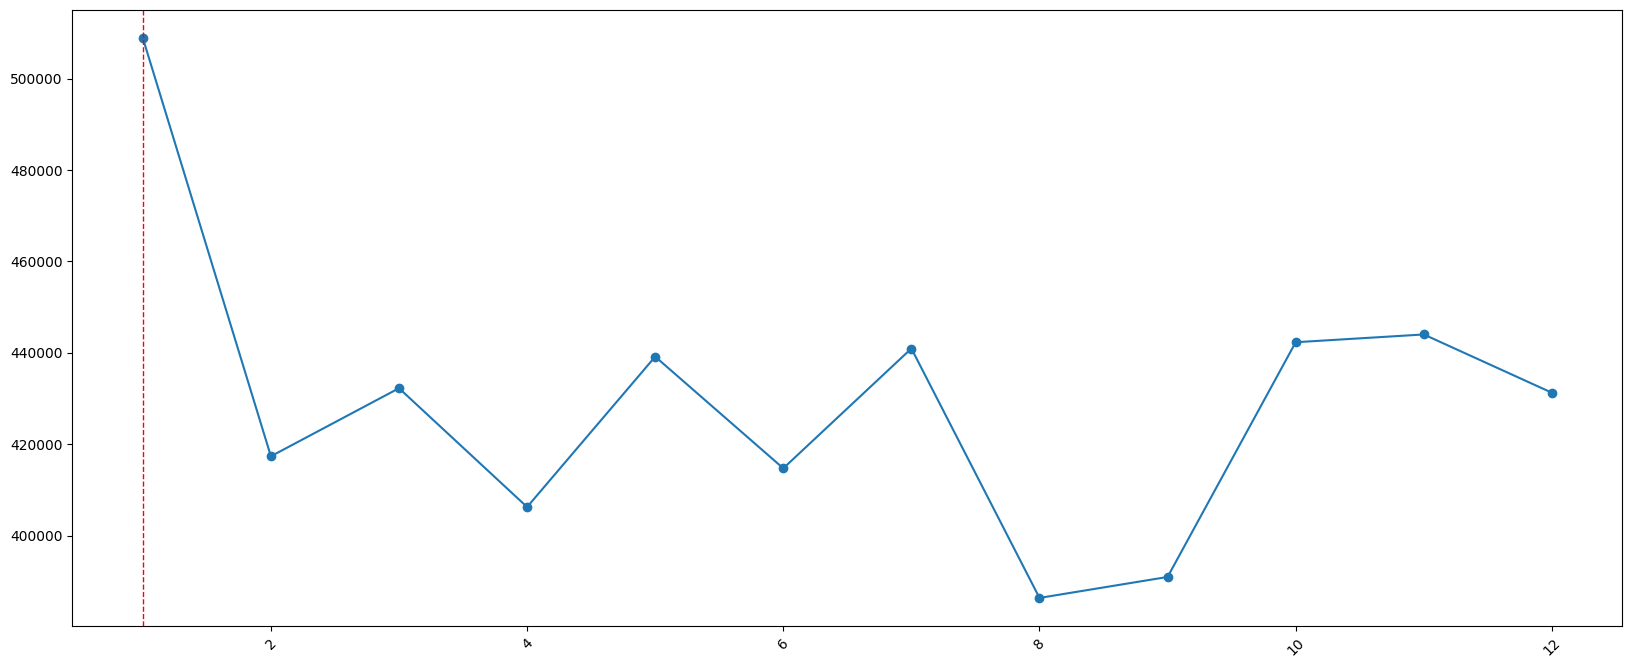

In [13]:
# 월 별 item count
month_user_item_counts = train_df.groupby(by=['month'])['item'].count().reset_index()
month_user_item_counts.columns = ['month', 'item_count']

max_ = month_user_item_counts['item_count'].max()
max_x = month_user_item_counts[month_user_item_counts['item_count'] == max_]['month'].values[0]

plt.figure(figsize=(20,8))
plt.plot(month_user_item_counts['month'], month_user_item_counts['item_count'], marker='o')
plt.xticks(rotation=45)
plt.axvline(x=max_x, color='red', linestyle='--', linewidth=1)
plt.show()

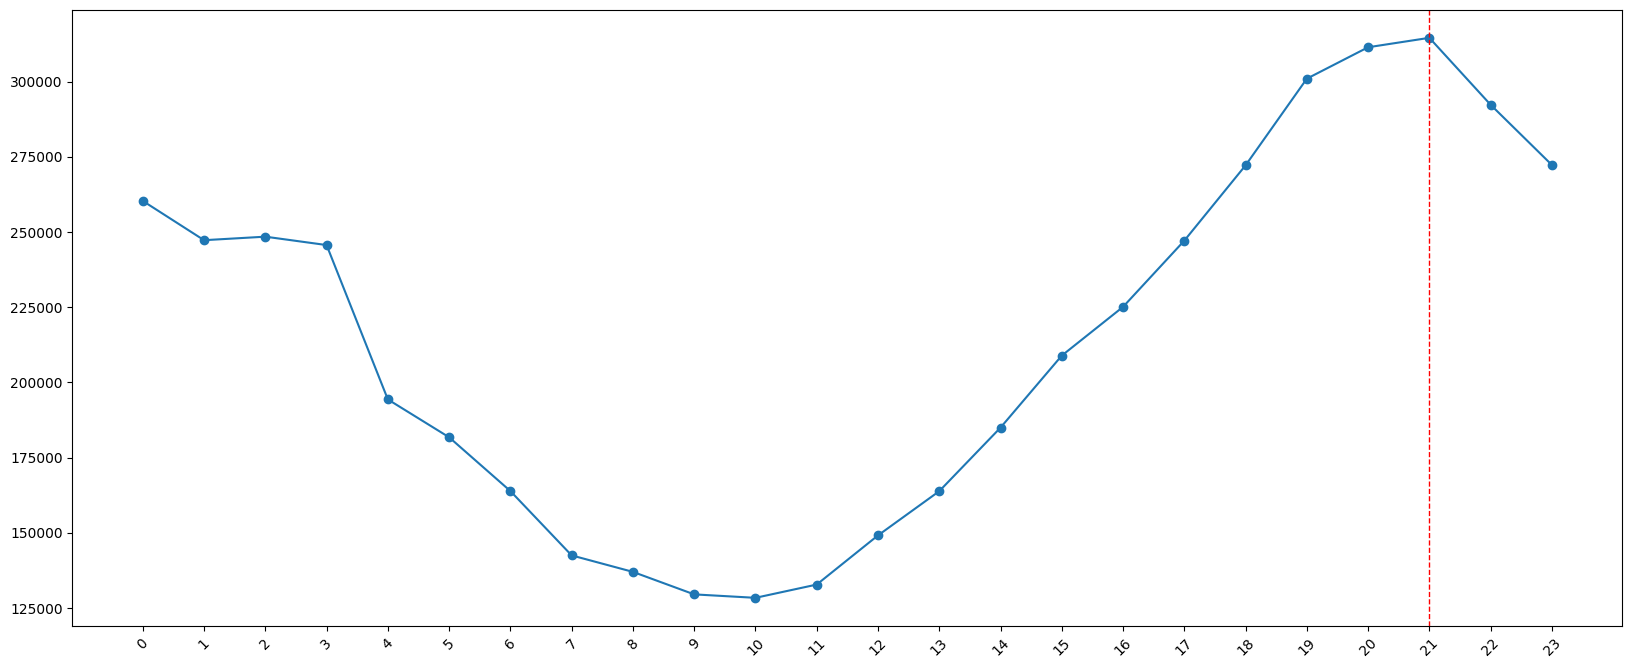

In [14]:
# 시간 별 item count
hour_user_item_counts = train_df.groupby(by=['hour'])['item'].count().reset_index()
hour_user_item_counts.columns = ['hour', 'item_count']

max_ = hour_user_item_counts['item_count'].max()
max_x = hour_user_item_counts[hour_user_item_counts['item_count'] == max_]['hour'].values[0]

plt.figure(figsize=(20,8))
plt.plot(hour_user_item_counts['hour'].astype('object'), hour_user_item_counts['item_count'], marker='o')
plt.xticks(ticks=range(24), labels=hour_user_item_counts['hour'], rotation=45)
plt.axvline(x=max_x, color='red', linestyle='--', linewidth=1)
plt.show()

### item

        item  item_count
1435    2571       19699
1642    2959       18437
179      296       18202
193      318       18168
220      356       17339
...      ...         ...
6800  117881          38
84       126          36
1426    2555          34
2313    4241          34
5165   51372          27

[6807 rows x 2 columns]


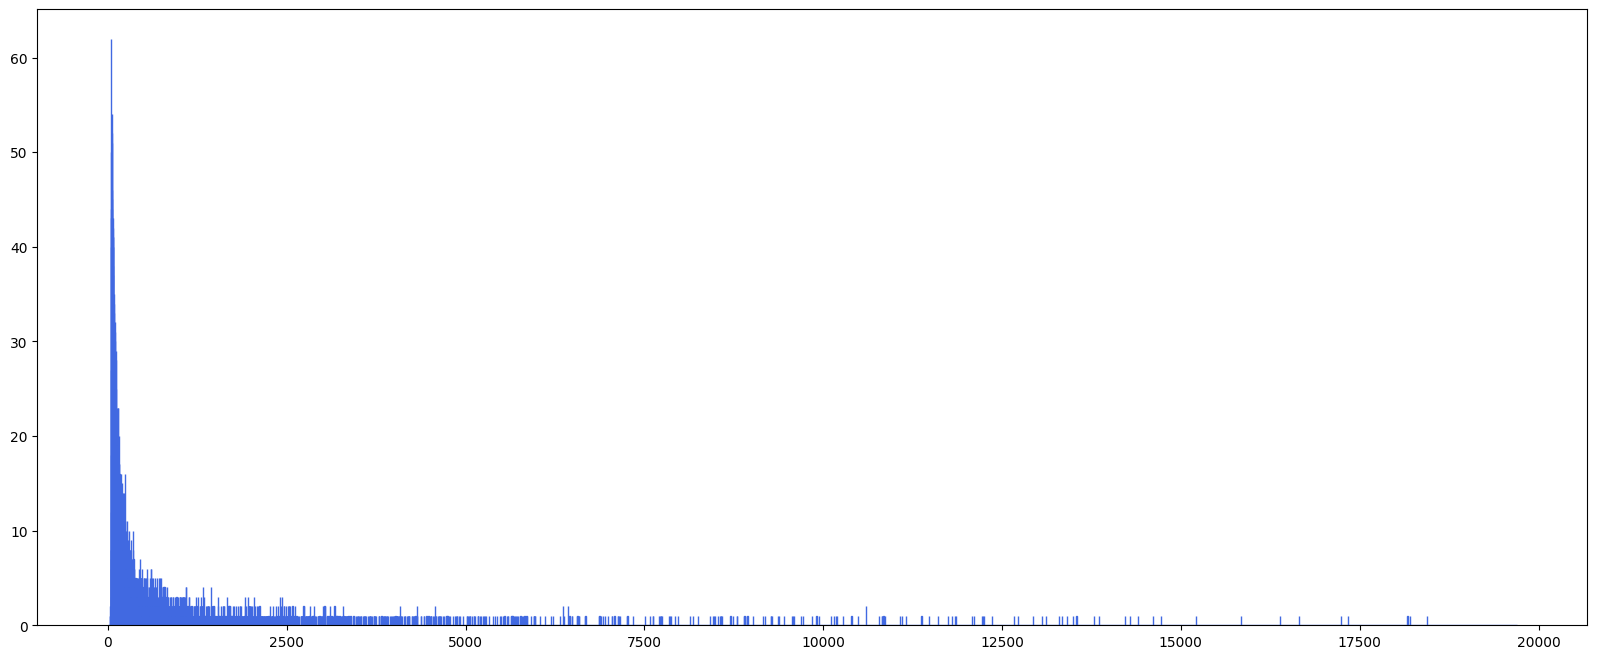

In [15]:
# item count
item_counts = train_df.groupby(by='item')['time'].count().reset_index()
item_counts.columns = ['item', 'item_count']
print(item_counts.sort_values(by='item_count', ascending=False))

plt.figure(figsize=(20,8))
plt.hist(item_counts['item_count'], bins=range(max(item_counts['item_count'])), edgecolor='royalblue', align='left')
plt.show()

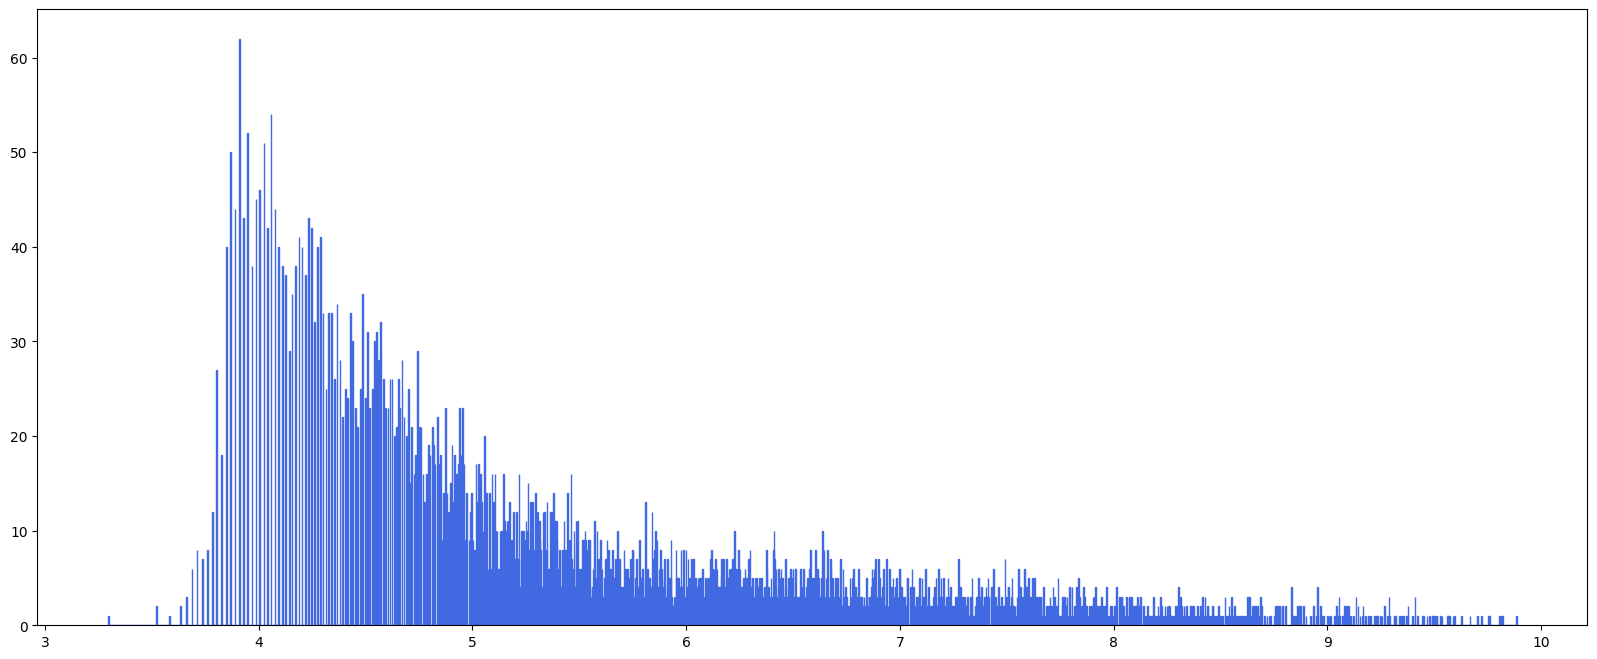

In [16]:
# log 변환
item_counts_log = np.log(item_counts['item_count'])

plt.figure(figsize=(20,8))
plt.hist(item_counts_log, bins=2000, edgecolor='royalblue', align='left')

plt.show()

## year_data

### 데이터 통계값

In [17]:
year_data.info()
year_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


,item,year
count,6799.000,6799.000
mean,26630.018,1992.175
std,32187.873,19.053
min,1.000,1922.000
25%,3052.500,1985.000
50%,6879.000,1999.000
75%,49840.000,2006.000
max,119141.000,2014.000


In [18]:
# 중복 행 확인
year_data[year_data.duplicated()]

,item,year


### year

    year  item_count
84  2006         284
85  2007         271
82  2004         262
83  2005         260
86  2008         256
..   ...         ...
2   1924           5
8   1930           4
0   1922           3
4   1926           2
1   1923           2

[93 rows x 2 columns]


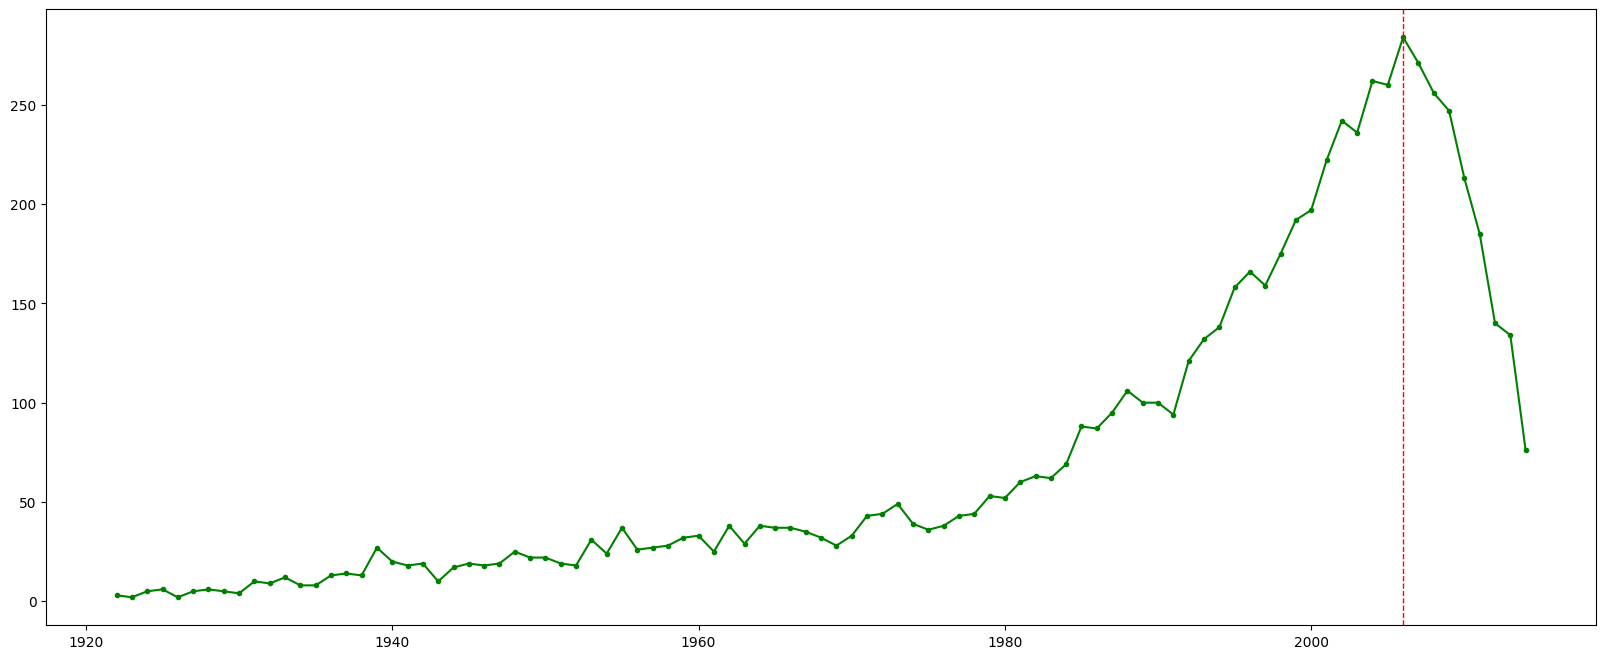

In [19]:
# year per item count
year_per_item_counts = year_data.groupby(by='year')['item'].count().reset_index()
year_per_item_counts.columns = ['year', 'item_count']
print(year_per_item_counts.sort_values(by='item_count', ascending=False))

max_ = year_per_item_counts['item_count'].max()
max_x = year_per_item_counts[year_per_item_counts['item_count'] == max_]['year'].values[0]

plt.figure(figsize=(20,8))
plt.plot(year_per_item_counts['year'], year_per_item_counts['item_count'], marker='.', color='green')
plt.axvline(x=max_x, color='red', linestyle='--', linewidth=1)
plt.show()

### merge train_data

In [20]:
# year_data가 전부 사용되었는지 여부
year_data[~year_data['item'].isin(train_df['item'].unique())]

,item,year


In [21]:
# train_df 병합
train_year_df = train_df.merge(year_data, on='item', how='left', suffixes=('', '_release'))
print(train_year_df.isnull().sum())

user               0
item               0
time               0
hour               0
weekday            0
month              0
year               0
year_month         0
year_release    1832
dtype: int64


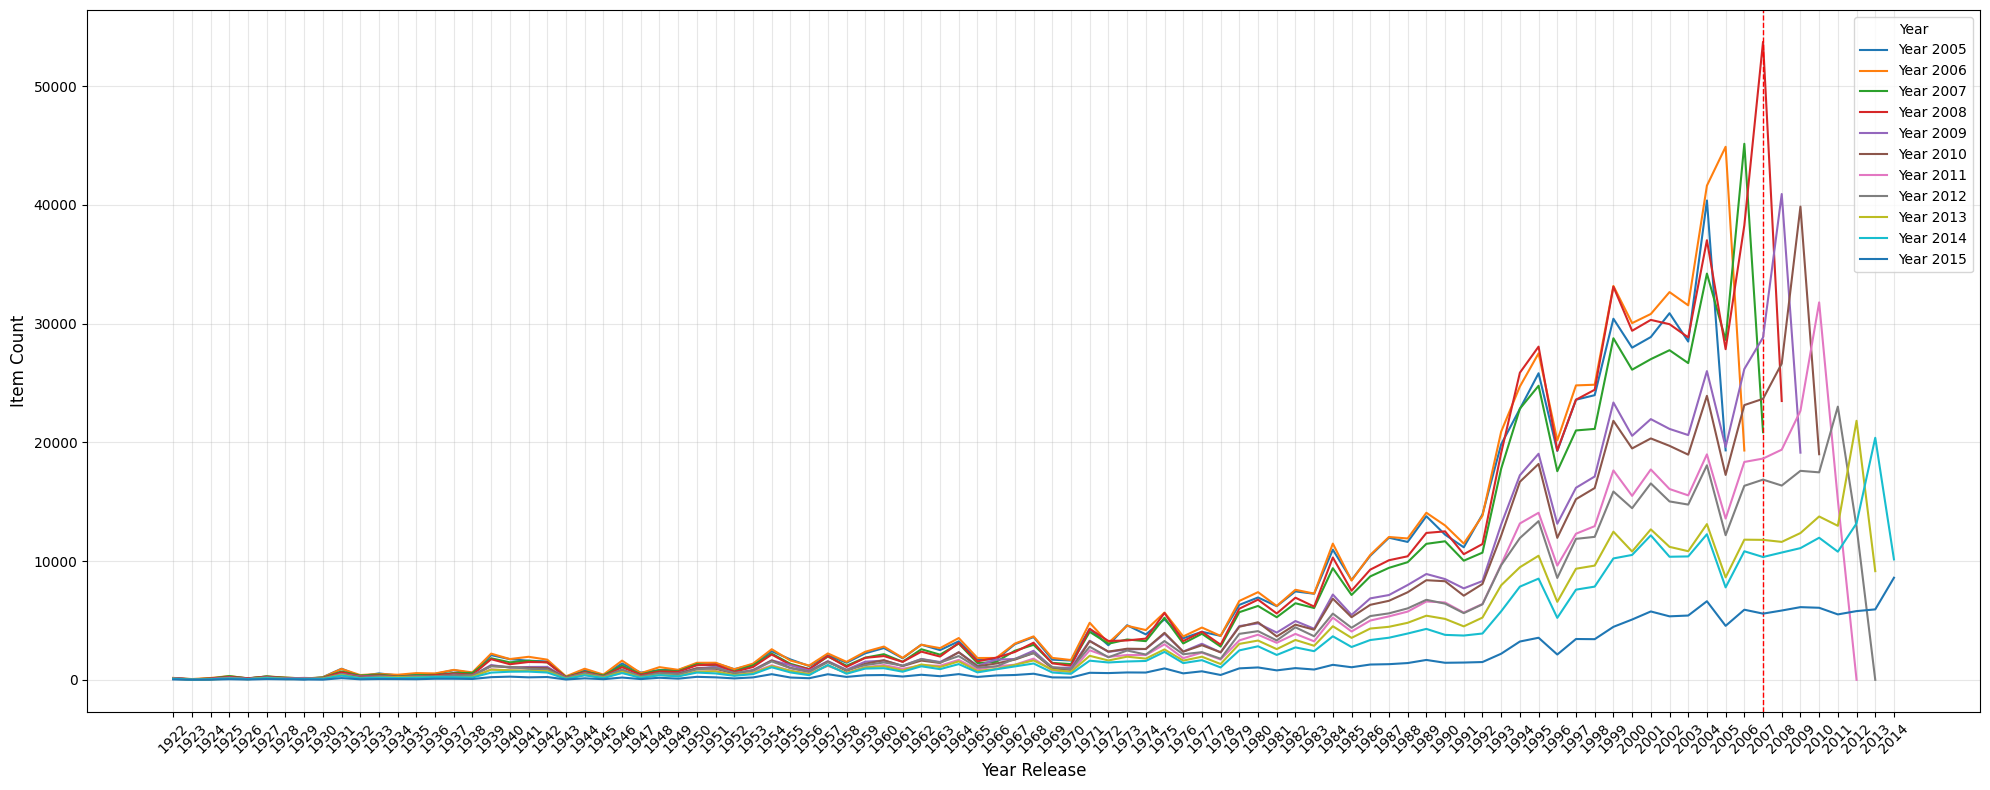

In [22]:
# train year per release year
year_per_release_counts = train_year_df.groupby(by=['year', 'year_release'])['item'].count().reset_index()
year_per_release_counts.columns = ['year', 'year_release', 'item_count']

plt.figure(figsize=(20,8))
colors = plt.cm.tab10.colors  # 기본 색상 팔레트

for y in range(2005,2016):
    data = year_per_release_counts[year_per_release_counts['year']==y]
    plt.plot(data['year_release'], data['item_count'], label=f'Year {y}')
    if y == 2008:
        max_ = data['item_count'].max()
        max_x = data[data['item_count'] == max_]['year_release'].values[0]
        plt.axvline(x=max_x, color='red', linestyle='--', linewidth=1)


plt.xlabel('Year Release', fontsize=12)
plt.ylabel('Item Count', fontsize=12)
plt.xticks(data['year_release'], rotation=45)
plt.legend(title='Year', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

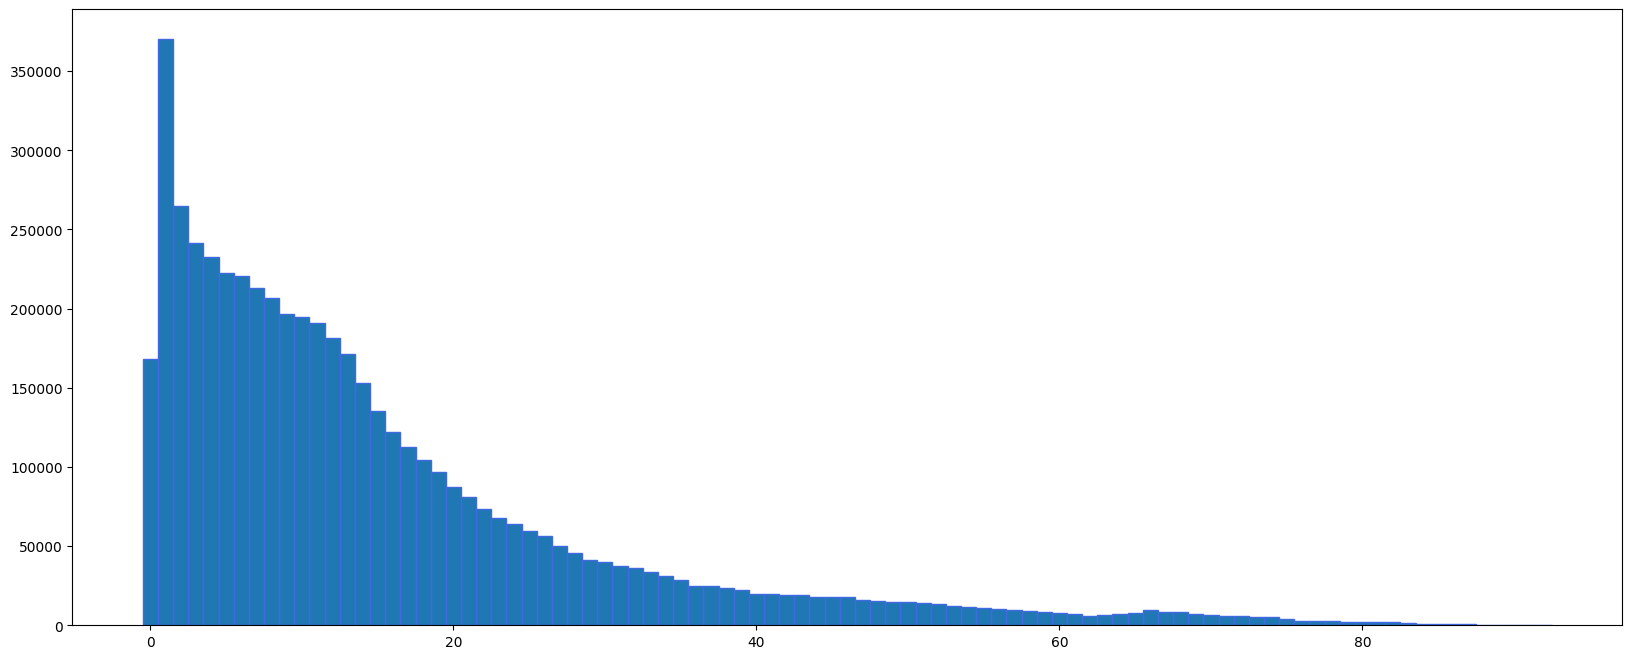

In [23]:
# 시청년도와 개봉년도 차이
train_year_df['year_diff'] = train_year_df['year'] - train_year_df['year_release']

plt.figure(figsize=(20,8))
plt.hist(train_year_df['year_diff'],bins=int(max(train_year_df['year_diff'])), range=(0, max(train_year_df['year_diff'])), edgecolor='royalblue', align='left')
plt.show()

## writer_df

### 데이터 통계값

In [24]:
writer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


In [25]:
print(writer_data['writer'].nunique())

2989


### writer

      item  writer_count
901   1907            24
383    783            23
204    364            21
1341  2687            21
2990  6889            19
...    ...           ...
31      36             1
32      39             1
36      45             1
37      46             1
38      47             1

[5648 rows x 2 columns]


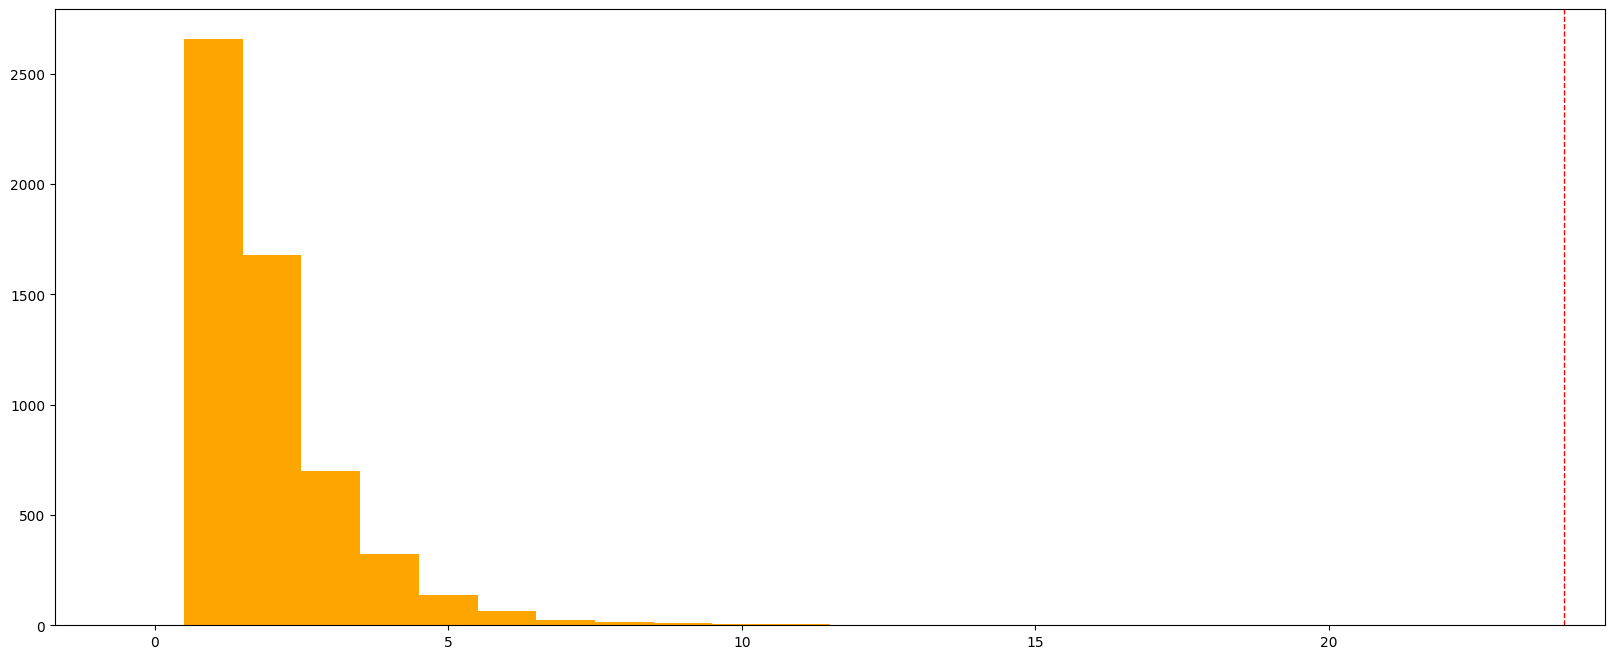

In [26]:
# item per writer count
item_per_writer_counts = writer_data.groupby(by='item')['writer'].count().reset_index()
item_per_writer_counts.columns = ['item', 'writer_count']
print(item_per_writer_counts.sort_values(by='writer_count', ascending=False))

max_ = item_per_writer_counts['writer_count'].max()

plt.figure(figsize=(20,8))
plt.hist(item_per_writer_counts['writer_count'], bins=max_, range=(0, max_), color='orange', align='left')
plt.axvline(x=max_, color='red', linestyle='--', linewidth=1)
plt.show()

         writer  item_count
11    nm0000095          47
96    nm0000636          35
28    nm0000175          32
1287  nm0372942          30
14    nm0000108          29
...         ...         ...
2965  nm2648685           2
2966  nm2744748           2
2968  nm2774833           2
1594  nm0494435           2
1581  nm0489995           2

[2989 rows x 2 columns]


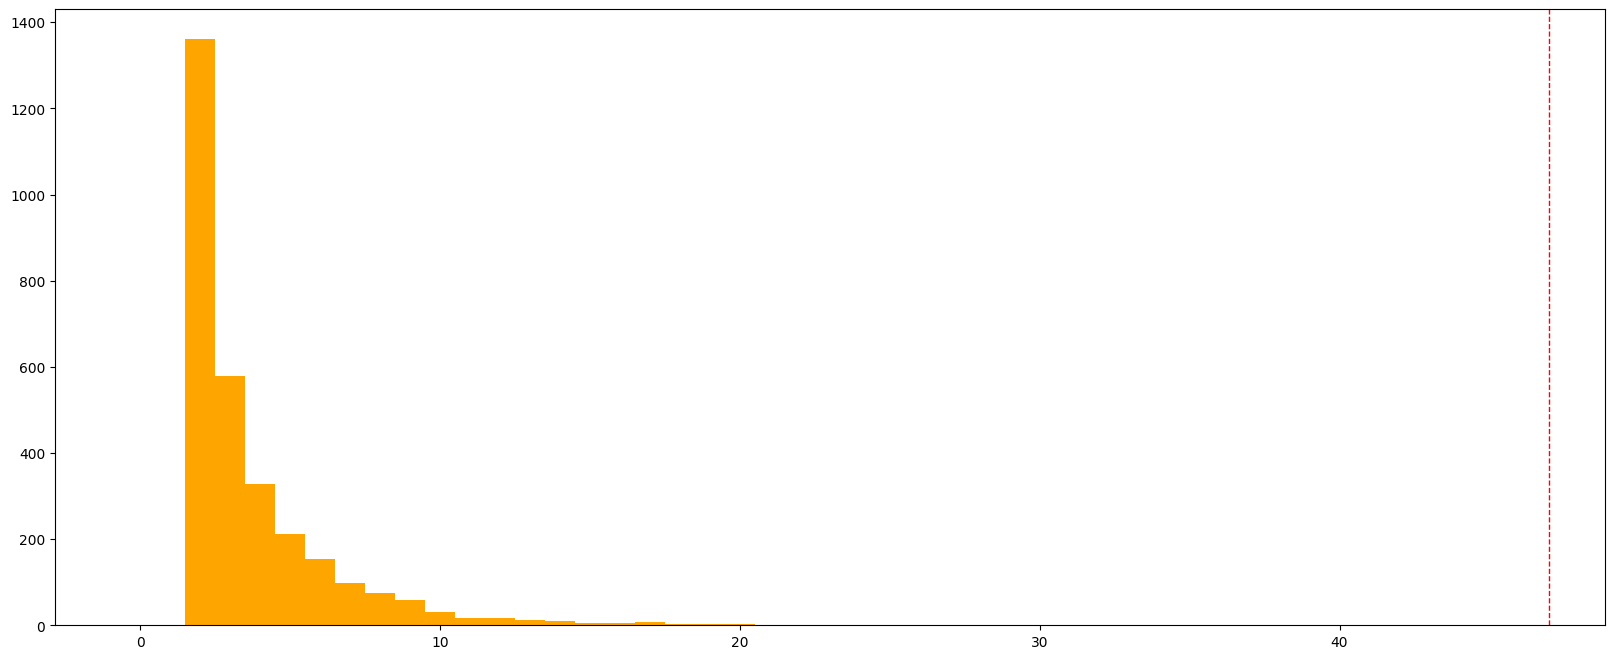

In [27]:
# writer per item count
writer_per_item_counts = writer_data.groupby(by='writer')['item'].count().reset_index()
writer_per_item_counts.columns = ['writer', 'item_count']
print(writer_per_item_counts.sort_values(by='item_count', ascending=False))

max_ = writer_per_item_counts['item_count'].max()

plt.figure(figsize=(20,8))
plt.hist(writer_per_item_counts['item_count'], bins=max_, range=(0, max_), color='orange', align='left')
plt.axvline(x=max_, color='red', linestyle='--', linewidth=1)
plt.show()

### merge train_df

In [28]:
# writer_data가 전부 사용되었는지 여부
writer_data[~writer_data['item'].isin(train_df['item'].unique())]

,item,writer


In [29]:
# train_df 병합 (writer 수로)
train_writer_df = train_df.merge(item_per_writer_counts, on='item', how='left')
train_writer_df # count로 봐야할듯

,user,item,time,hour,weekday,month,year,year_month,writer_count
0,11,4643,2009-01-01 04:02:09,4,3,1,2009,2009-01,4.000
1,11,170,2009-01-01 04:02:14,4,3,1,2009,2009-01,NaN
2,11,531,2009-01-01 04:02:19,4,3,1,2009,2009-01,2.000
3,11,616,2009-01-01 04:02:22,4,3,1,2009,2009-01,7.000
4,11,2140,2009-01-01 04:02:43,4,3,1,2009,2009-01,2.000
...,...,...,...,...,...,...,...,...,...
5154466,138493,44022,2009-12-07 18:10:49,18,0,12,2009,2009-12,3.000
5154467,138493,4958,2009-12-07 18:11:22,18,0,12,2009,2009-12,4.000
5154468,138493,68319,2009-12-07 18:15:20,18,0,12,2009,2009-12,2.000
5154469,138493,40819,2009-12-07 18:15:26,18,0,12,2009,2009-12,2.000


## director_data

       item  director_count
4304  50912              14
662    1282              10
3711  27002               8
3192   7502               7
326     596               7
...     ...             ...
1877   3871               1
1876   3869               1
1875   3868               1
1874   3865               1
1884   3897               1

[5503 rows x 2 columns]


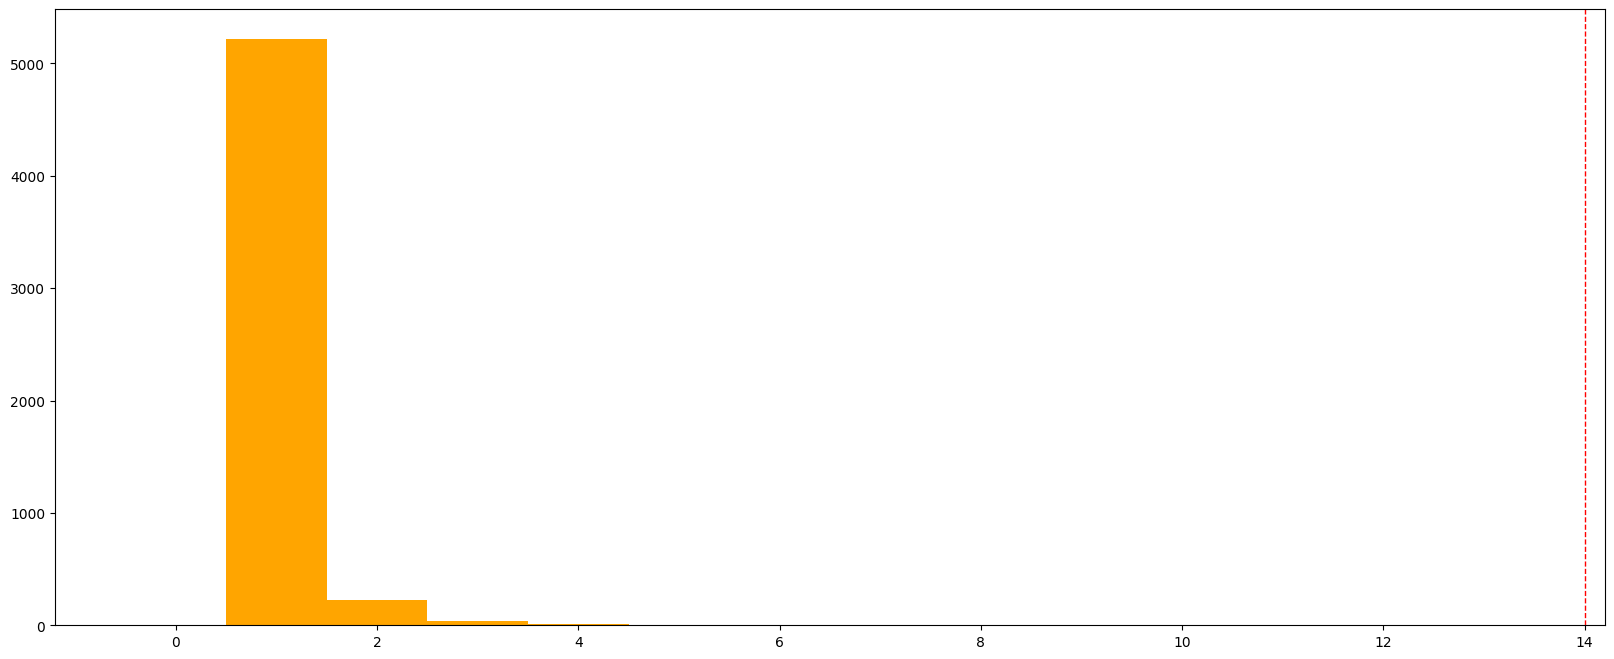

In [30]:
# item per director count
item_per_director_counts = director_data.groupby(by='item')['director'].count().reset_index()
item_per_director_counts.columns = ['item', 'director_count']
print(item_per_director_counts.sort_values(by='director_count', ascending=False))

max_ = item_per_director_counts['director_count'].max()

plt.figure(figsize=(20,8))
plt.hist(item_per_director_counts['director_count'], bins=max_, range=(0, max_), color='orange', align='left')
plt.axvline(x=max_, color='red', linestyle='--', linewidth=1)
plt.show()

       director  director_count
12    nm0000095              44
2     nm0000033              33
23    nm0000142              31
35    nm0000229              29
34    nm0000217              26
...         ...             ...
1268  nm1134029               2
1271  nm1160962               2
1273  nm1170855               2
1275  nm1201875               2
1254  nm1012501               2

[1340 rows x 2 columns]


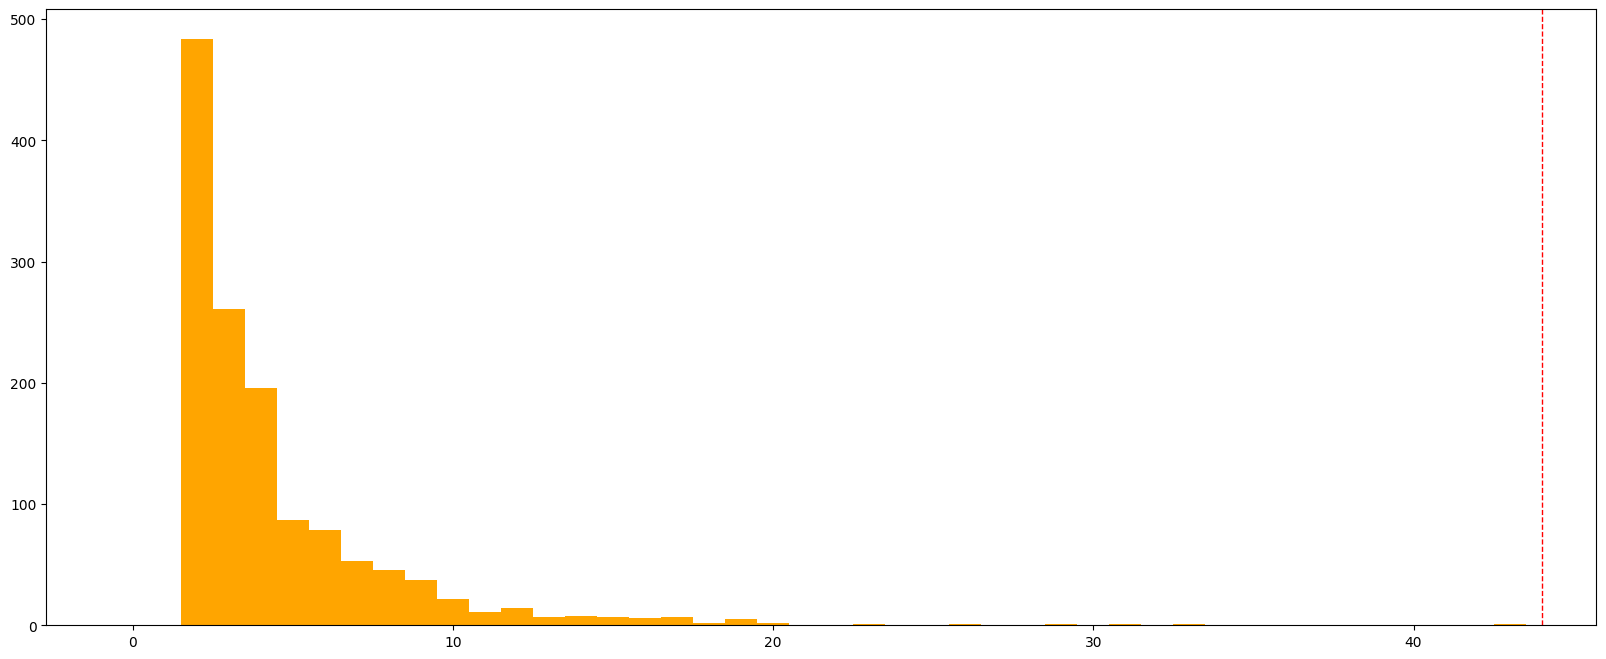

In [31]:
# director per item count
director_per_item_counts = director_data.groupby(by='director')['item'].count().reset_index()
director_per_item_counts.columns = ['director', 'director_count']
print(director_per_item_counts.sort_values(by='director_count', ascending=False))

max_ = director_per_item_counts['director_count'].max()

plt.figure(figsize=(20,8))
plt.hist(director_per_item_counts['director_count'], bins=max_, range=(0, max_), color='orange', align='left')
plt.axvline(x=max_, color='red', linestyle='--', linewidth=1)
plt.show()

### merge train_df

In [32]:
# director_data가 전부 사용되었는지 여부
director_data[~director_data['item'].isin(train_df['item'].unique())]

,item,director


In [33]:
# train_df 병합 (writer 수로)
train_writer_df = train_df.merge(item_per_director_counts, on='item', how='left')
train_writer_df # count로 봐야할듯

,user,item,time,hour,weekday,month,year,year_month,director_count
0,11,4643,2009-01-01 04:02:09,4,3,1,2009,2009-01,1.000
1,11,170,2009-01-01 04:02:14,4,3,1,2009,2009-01,1.000
2,11,531,2009-01-01 04:02:19,4,3,1,2009,2009-01,1.000
3,11,616,2009-01-01 04:02:22,4,3,1,2009,2009-01,1.000
4,11,2140,2009-01-01 04:02:43,4,3,1,2009,2009-01,2.000
...,...,...,...,...,...,...,...,...,...
5154466,138493,44022,2009-12-07 18:10:49,18,0,12,2009,2009-12,1.000
5154467,138493,4958,2009-12-07 18:11:22,18,0,12,2009,2009-12,1.000
5154468,138493,68319,2009-12-07 18:15:20,18,0,12,2009,2009-12,1.000
5154469,138493,40819,2009-12-07 18:15:26,18,0,12,2009,2009-12,1.000


## title_data

title의 맨 뒤 년도 빼자/ 시리즈 처리해야함

In [34]:
title_data[title_data['title'].str.contains('transformers', case=False)]

,item,title
344,53996,Transformers (2007)
968,69526,Transformers: Revenge of the Fallen (2009)
3639,4006,Transformers: The Movie (1986)
5493,87520,Transformers: Dark of the Moon (2011)
6598,112370,Transformers: Age of Extinction (2014)


In [35]:
title_data[title_data['title'].str.contains('harry potter', case=False)]

,item,title
110,8368,Harry Potter and the Prisoner of Azkaban (2004)
125,40815,Harry Potter and the Goblet of Fire (2005)
129,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...
155,5816,Harry Potter and the Chamber of Secrets (2002)
238,54001,Harry Potter and the Order of the Phoenix (2007)
350,69844,Harry Potter and the Half-Blood Prince (2009)
358,88125,Harry Potter and the Deathly Hallows: Part 2 (...
376,81834,Harry Potter and the Deathly Hallows: Part 1 (...


In [36]:
title_data[title_data['title'].str.contains('spider-man', case=False)]

,item,title
69,5349,Spider-Man (2002)
106,8636,Spider-Man 2 (2004)
599,52722,Spider-Man 3 (2007)
4589,95510,"Amazing Spider-Man, The (2012)"
6376,110553,The Amazing Spider-Man 2 (2014)


In [37]:
title_data[title_data['title'].str.contains('shrek', case=False)]

,item,title
21,4306,Shrek (2001)
120,8360,Shrek 2 (2004)
3527,53121,Shrek the Third (2007)
3706,78637,Shrek Forever After (a.k.a. Shrek: The Final C...
3962,64249,Shrek the Halls (2007)


### merge train_df

In [38]:
# title_data 전부 사용되었는지 여부
title_data[~title_data['item'].isin(train_df['item'].unique())]

,item,title


In [39]:
# train_df 병합
train_title_df = train_df.merge(title_data, on='item', how='left')

## genre_data

In [40]:
genre_data['genre'].unique()

array(['Crime', 'Drama', 'Action', 'Sci-Fi', 'Thriller', 'Comedy',
       'Romance', 'War', 'Adventure', 'Fantasy', 'Horror', 'Mystery',
       'Animation', 'Children', 'Film-Noir', 'Musical', 'Western',
       'Documentary'], dtype=object)

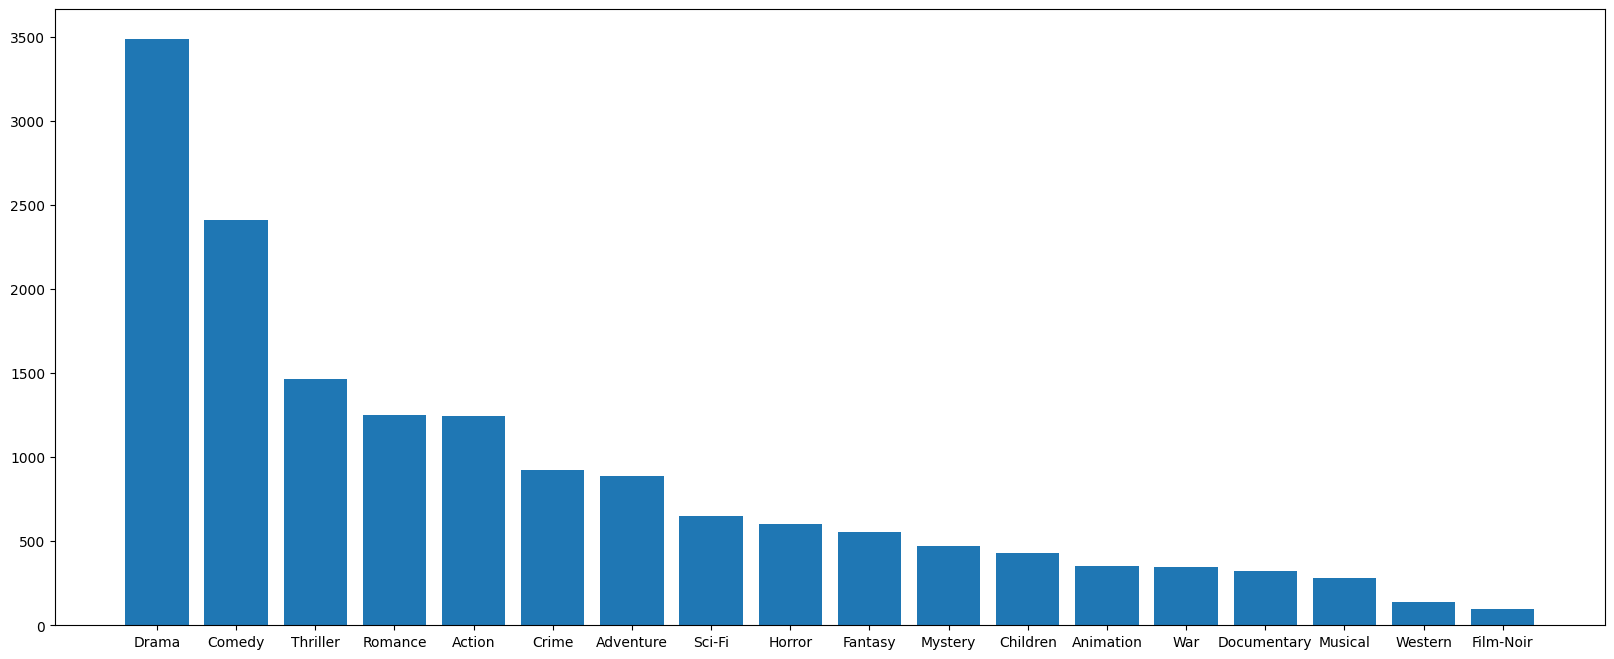

In [41]:
# genre per item count
genre_per_item_counts = genre_data.groupby(by='genre')['item'].count().reset_index()
genre_per_item_counts.columns = ['genre', 'item_count']
genre_per_item_counts = genre_per_item_counts.sort_values(by='item_count', ascending=False)

plt.figure(figsize=(20,8))
plt.bar(genre_per_item_counts['genre'], genre_per_item_counts['item_count'])
plt.show()

In [42]:
# item per genre count
item_per_genre_counts = genre_data.groupby(by='item')['genre'].count().reset_index()
item_per_genre_counts.columns = ['item', 'genre_count']
item_per_genre_counts['genre_count'].value_counts()

genre_count
2     2280
3     1786
1     1756
4      726
5      212
6       38
7        7
8        1
10       1
Name: count, dtype: int64

## Total

In [47]:
train_total_df = train_df.merge(year_data, on='item', how='left', suffixes=('', '_release'))
train_total_df = train_total_df.merge(item_per_writer_counts, on='item', how='left')
train_total_df = train_total_df.merge(item_per_director_counts, on='item', how='left')
#train_total_df = train_total_df.merge(title_data, on='item', how='left')
train_total_df = train_total_df.merge(item_per_genre_counts, on='item', how='left')

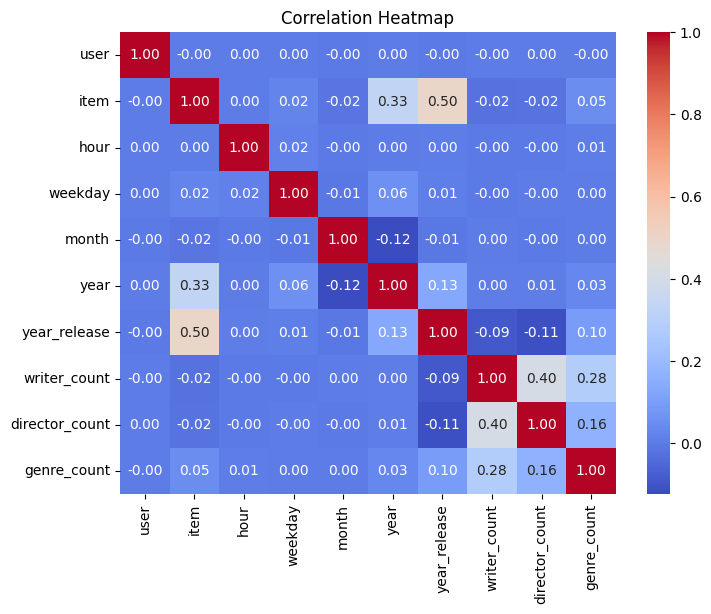

In [44]:
# 상관관계 계산
correlation_matrix = train_total_df.corr(numeric_only=True)

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()